In [1]:
from qem.crystal_analyzer import CrystalAnalyzer
import hyperspy.api as hs   
import scipy.io as sio

file = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_25.hspy'
s = hs.load(file)
image = s.data
dx =0.071356
matfile_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_coords.mat'
matfile = sio.loadmat(matfile_path)
coords = matfile['coords'].astype(float)
crystal_analyzer = CrystalAnalyzer(image, dx, coords[:,:2]/dx, coords[:,2].astype(int)-1,['Y','Al'])

In [2]:
import numpy as np
cif_file_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/STEM/72104-CaYAlO4-rotated.cif'

crystal_analyzer.read_cif(cif_file_path)


Atoms(symbols='Y4Al2O8', pbc=True, cell=[3.6451, 11.8743, 3.6451], spacegroup_kinds=...)

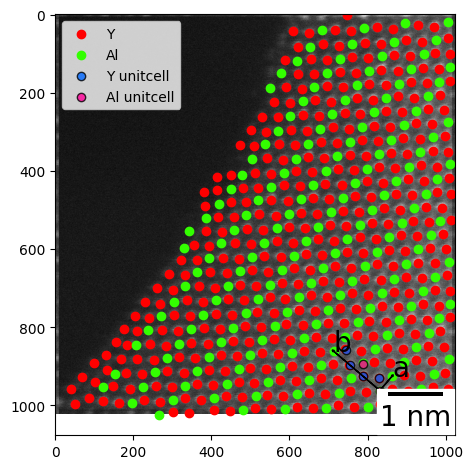

In [3]:
import numpy as np
crystal_analyzer.origin = np.array([831.26558017, 962.21710935])
crystal_analyzer.a_vector_affine = np.array([ 31.26403339, -36.73158211])
crystal_analyzer.b_vector_affine = np.array([-118.32881689, -100.67459688])
# crystal_analyzer.c = crystal_analyzer.unitcell.cell[2]
atoms = crystal_analyzer.align_unit_cell_to_image(mode='affine')

In [4]:
%matplotlib qt
crystal_analyzer.get_atomic_columns(reciprocal=False)

/home/zzhang/OneDrive/code/qem/qem/gui_classes.py:361: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(
INFO:root:Origin selected: [805.94093046 750.34292678]
INFO:root:Vector a selected: [ 30.03475348 -36.56702424]
INFO:root:Vector b selected: [-120.03946331 -101.7785301 ]
INFO:root:In pixel: Origin: [805.94093046 750.34292678], Vector a: [ 30.03475348 -36.56702424], Vector b: [-120.03946331 -101.7785301 ]
INFO:root:In space: Origin: [57.50872103 53.54146988] A, Vector a: [ 2.14315987 -2.60927658] A, Vector b: [-8.56553594 -7.26250879] A
INFO:root:Perfect a: [ 32.42300875 -39.47470212] pixel, Perfect b: [-128.59303047 -105.62139112] pixel by rotation of unit cell and scaling with pixel size.


AtomicColumns(lattice=Atoms(symbols='Al193Y380', pbc=False, cell=[73.068544, 73.068544, 3.6451], spacegroup_kinds=...), lattice_ref=Atoms(symbols='Al193Y380', pbc=False, cell=[[-3.304166333859367, 81.23332122356875, 0.0], [-2.688459676663736, 82.22114871527367, 0.0], [0.0, 0.0, 3.6451]], spacegroup_kinds=...), elements=['Y', 'Al'], tol=0, pixel_size=0.071356)

In [5]:
crystal_analyzer.plot_unitcell()

In [11]:
crystal_analyzer.plot_displacement('local')

In [9]:
crystal_analyzer.plot_strain(3.0)

In [9]:
import matplotlib.pyplot as plt
shift_origin_adaptive = crystal_analyzer.get_origin_offset(15,15)
shifts = np.array(list(shift_origin_adaptive.values()))
plt.imshow(crystal_analyzer.image)
plt.scatter(shifts[:,0],shifts[:,1],color='y',label='adaptive')

shift_origin_perfect = crystal_analyzer.get_origin_offset(15,15, mode='perfect')
shifts = np.array(list(shift_origin_perfect.values()))
plt.scatter(shifts[:,0],shifts[:,1],color='b',label='perfect')

plt.legend()
plt.title('Unit cell origin locations')

Text(0.5, 1.0, 'Unit cell origin locations')

In [9]:
lattice, lattice_ref = crystal_analyzer.get_lattice_3d(a_limit=20,b_limit=15)
lattice_ref.write('test.xyz')
from ase.visualize import view
view(lattice_ref)

<Popen: returncode: None args: ['/home/zzhang/miniconda3/envs/jax/bin/python...>

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [32]:
crystal_analyzer.unit_cell.set_tags([0,1,2,3,4,5])

In [ ]:
crystal_analyzer.unit_cell[1].tag

In [ ]:
crystal_analyzer.unit_cell.get_tags()

In [ ]:
view(crystal_analyzer.unit_cell)

In [1]:
from ase import Atoms
from ase.io import read
from ase.visualize import view
import numpy as np

lattice = read('TiO2_mp-554278_conventional_standard.cif')
lattice_ref = read('TiO2_mp-554278_conventional_standard.cif')
# lattice.positions = lattice.positions *1.1
strain_tensor = np.array([[1.1, 0, 0],
                          [0, 1.1, 0],
                          [0, 0, 1]])
# new_cell = np.dot(lattice.cell,strain_tensor)
# lattice.set_cell(new_cell)
# get the fractional coordinates
lattice.set_cell(np.dot(strain_tensor,lattice.cell))
lattice.set_scaled_positions(lattice_ref.get_scaled_positions())
# lattice.set_positions(strain_tensor @ lattice.cell @ lattice.get_scaled_positions())
# view(lattice)

from qem.atomic_column import AtomicColumns

atomic_columns = AtomicColumns(lattice, lattice_ref,elements=['Ti','O'],pixel_size=1)


In [7]:
import matplotlib.pyplot as plt
plt.scatter(lattice.positions[:,1],lattice.positions[:,0],c='r')
plt.scatter(lattice_ref.positions[:,1],lattice_ref.positions[:,0],c='b')

In [13]:
atomic_columns.get_strain( 5.0)

/home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/matscipy/atomic_strain.py:107: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, residuals, rank, s = np.linalg.lstsq(dr_old[mask], dr_now[mask])


(array([1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]),
 array([1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]),
 array([-5.71494149e-17, -1.22098196e-16, -5.53704470e-17,  4.98671457e-17,
         1.67930692e-16,  2.42438981e-16,  3.56043648e-16,  1.34637806e-16,
         2.42707382e-17,  2.56830563e-17, -1.25097790e-17,  9.95908026e-17,
        -1.72580010e-16, -2.00000351e-16, -3.84919846e-16,  1.94557153e-17,
        -7.25209050e-17,  6.77767688e-17, -1.87228337e-16,  9.86248717e-17,
         2.12632109e-16,  6.20919252e-16,  2.40474732e-16,  1.61476466e-16]),
 array([ 6.40883088e-17, -4.09658109e-17, -1.40184921e-17,  6.11551568e-17,
        -5.34389430e-17,  1.94711335e-16,  2.54579015e-16,  9.43456928e-17,
        -4.16179730e-17,  6.10531175e-17,  3.85306312e-17,  6.69426511e-17,
        -9.45674052e-17, -1.55617962e-

In [13]:
atomic_strain(lattice, lattice_ref,cutoff=10.0)[0].shape

(24, 3, 3)

In [11]:
from matscipy.atomic_strain import atomic_strain

atomic_strain(lattice, lattice_ref,cutoff=10.0)

(array([[[ 1.10000000e+00,  2.81025203e-16,  3.04682581e-02],
         [-2.62090382e-17,  1.10000000e+00, -2.22044605e-16],
         [ 5.22123608e-17,  1.11022302e-16,  1.00000000e+00]],
 
        [[ 8.67212388e-01,  5.73413805e-01,  6.13175537e-02],
         [ 3.17364054e-17,  1.10000000e+00,  4.44089210e-16],
         [ 1.33024162e-16,  2.22044605e-16,  1.00000000e+00]],
 
        [[ 1.10000000e+00, -9.71445147e-17,  3.04682581e-02],
         [-1.14440939e-16,  1.10000000e+00, -1.11022302e-16],
         [ 9.95641690e-17, -1.11022302e-16,  1.00000000e+00]],
 
        [[ 1.10000000e+00,  3.98986399e-16,  3.04682581e-02],
         [ 4.71525446e-17,  1.10000000e+00,  4.44089210e-16],
         [ 1.87679184e-16,  4.44089210e-16,  1.00000000e+00]],
 
        [[ 1.10000000e+00,  2.81025203e-16,  3.04682581e-02],
         [ 5.94834805e-17,  1.10000000e+00,  2.22044605e-16],
         [ 7.09728221e-17, -4.44089210e-16,  1.00000000e+00]],
 
        [[ 8.73556412e-01,  5.51317912e-01, -1.80865049

In [11]:
lattice.write('deformed.xyz')
lattice_ref.write('reference.xyz')

In [1]:
# -*- coding: utf-8 -*-

from ovito.io import import_file, export_file
from ovito.modifiers import *

node = import_file("deformed.xyz")

modifier=AtomicStrainModifier()
modifier.reference.load("reference.xyz")


#Cutoff should account for 3 neighbor shells, for fcc that is 1.225 times a, Here we use L512 lattice constant of aluminum (QCGD)
modifier.cutoff=5.0

#modifier.output_deformation_gradients=True
#modifier.output_nonaffine_squared_displacements=True
modifier.output_strain_tensors=True

#Calculate Atomic strains
node.modifiers.append(modifier)

modifier1 = CommonNeighborAnalysisModifier()
node.modifiers.append(modifier1)



/home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/ovito/_extensions/anari.py:2: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? This will likely lead to conflicts with existing libraries in the Anaconda environment, and import of the OVITO module may fail with an error related to the Qt framework. To fix this, please uninstall the ovito pip package by running 'pip uninstall -y ovito PySide6' and then install the OVITO Anaconda package provided by OVITO GmbH. Visit https://docs.ovito.org/python/introduction/installation.html for further instructions. If you would rather like to ignore this warning message, add the following code to the top of your Python script:

  import warnings
  warnings.filterwarnings('ignore', message='.*OVITO.*PyPI')

  import ovito._extensions.pyscript


ImportError: /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/PySide6/Qt/lib/libQt6Gui.so.6: undefined symbol: _Zls6QDebugRK15QDBusObjectPath, version Qt_6